In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [42]:
# Função usada na análise exploratoria das variaveis qualitativas
def boxplot_quantitativas(data, x):
    sns.boxplot(data=data, x=x)
    plt.xticks(rotation=0)
    plt.show()



def countplot_qualitativas(data, x):
    sns.countplot(data=data, x=x)
    plt.xticks(rotation=45)
    plt.show()


In [6]:
credito = pd.read_csv("credito.csv", header=None)
credito.columns = ["idade", "sexo", "dependentes", "escolaridade", "estado_civil", "salario_anual", 
                   "tipo_cartao", "qtd_produtos", "iteracoes_12m", "meses_inativo_12m", "limite_credito", 
                   "valor_transacoes_12m", "qtd_transacoes_12m"]
credito.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28


In [8]:
# Overview do tipo dos dados:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idade                 2564 non-null   int64  
 1   sexo                  2564 non-null   object 
 2   dependentes           2564 non-null   int64  
 3   escolaridade          2564 non-null   object 
 4   estado_civil          2564 non-null   object 
 5   salario_anual         2564 non-null   object 
 6   tipo_cartao           2564 non-null   object 
 7   qtd_produtos          2564 non-null   int64  
 8   iteracoes_12m         2564 non-null   int64  
 9   meses_inativo_12m     2564 non-null   int64  
 10  limite_credito        2564 non-null   float64
 11  valor_transacoes_12m  2564 non-null   float64
 12  qtd_transacoes_12m    2564 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 260.5+ KB


In [9]:
#Overview de missing dos dados:
credito.isna().sum()


idade                   0
sexo                    0
dependentes             0
escolaridade            0
estado_civil            0
salario_anual           0
tipo_cartao             0
qtd_produtos            0
iteracoes_12m           0
meses_inativo_12m       0
limite_credito          0
valor_transacoes_12m    0
qtd_transacoes_12m      0
dtype: int64

In [15]:
var_quantitativas = credito.columns.drop(['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao'])
colunas = list(credito.columns)
var_qualitativas = [x for x in colunas if x not in var_quantitativas]

# Separamos as variaveis quantitativas e qualitativas para fazer a análise exploratória.


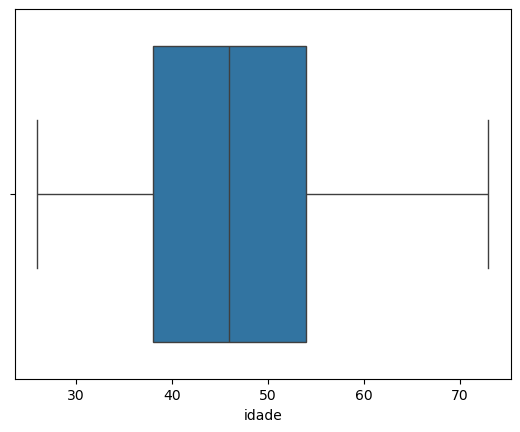

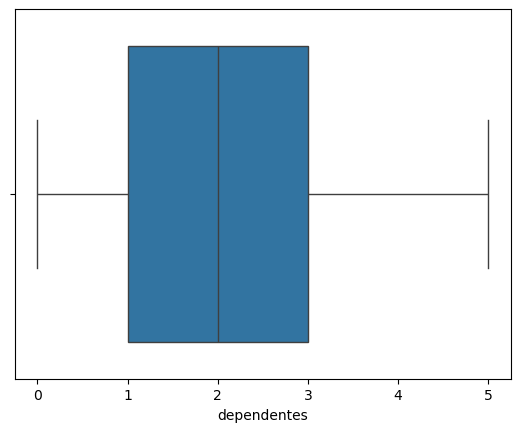

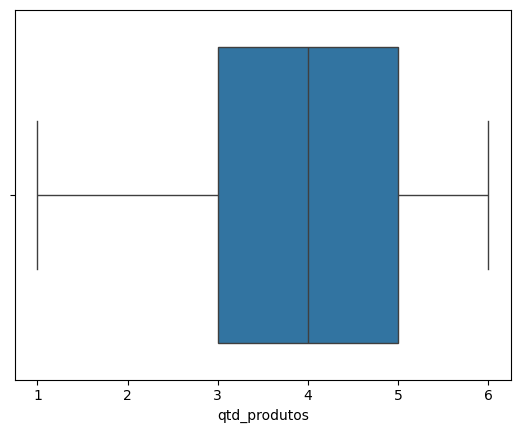

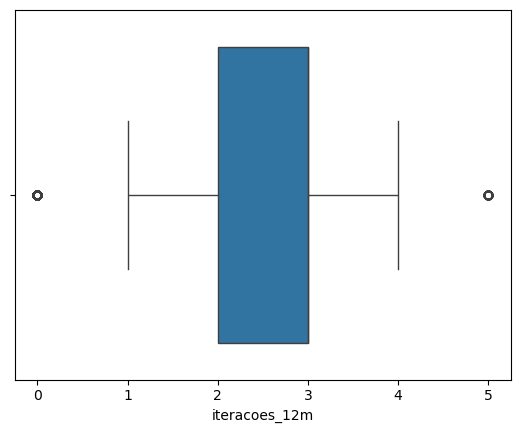

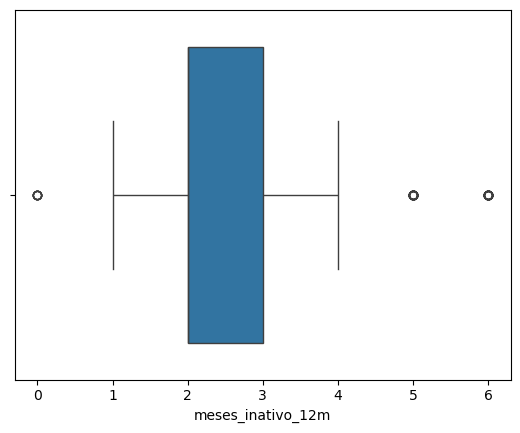

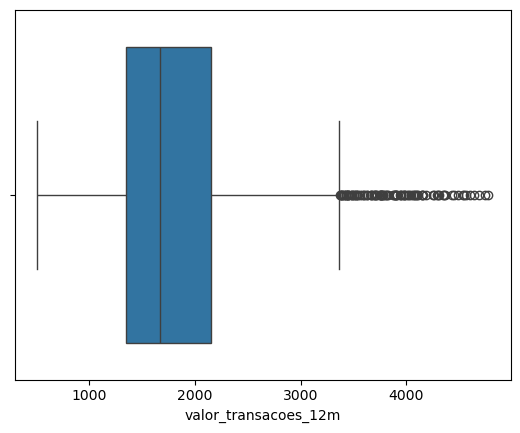

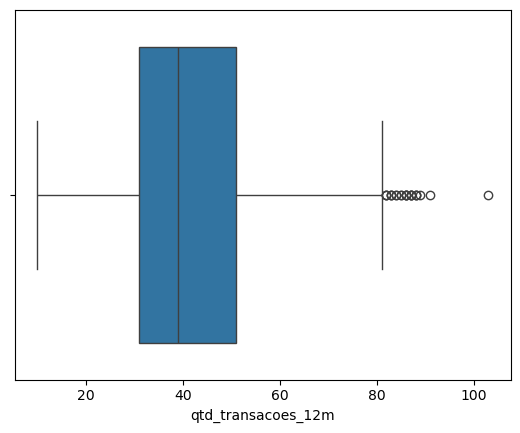

In [39]:
# Criando exploratória para as variáveis quantitativas, escolhemos o boxplot pois ele nos permitirá visualizar
# simultaneamente a media, a distribuição, e os eventuais outliers de cada categoria:

for c in var_quantitativas:
    if c != 'limite_credito':
        boxplot_quantitativas(data=credito, x=c)


Nas variáveis quantitativas, os únicos outliers que encontramos são aqueles que não têm significância real,são apenas ocorrências raras, mas que não representam erros na coleta dos dados nem nada do gênero, assim sendo, não precisamos nos preocupar. Como rodaremos um algorítmo de machine-learning, não faz sentido "tratar" essas ocorrências ainda.


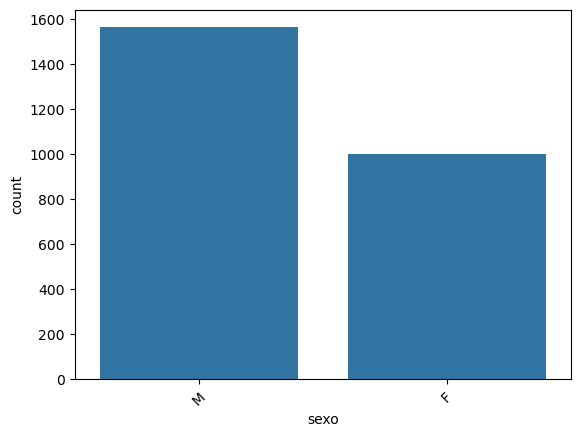

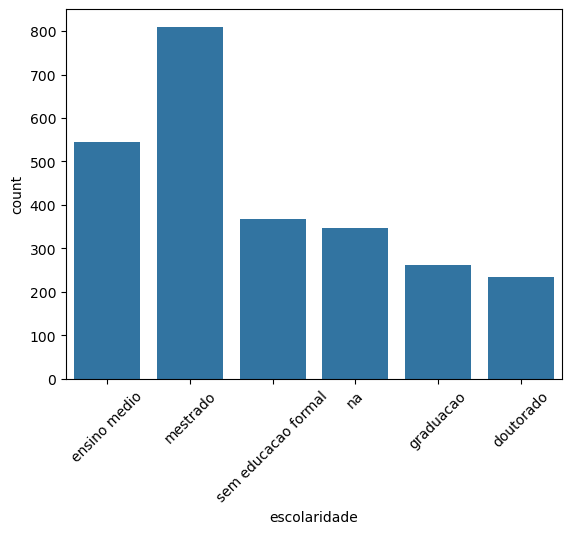

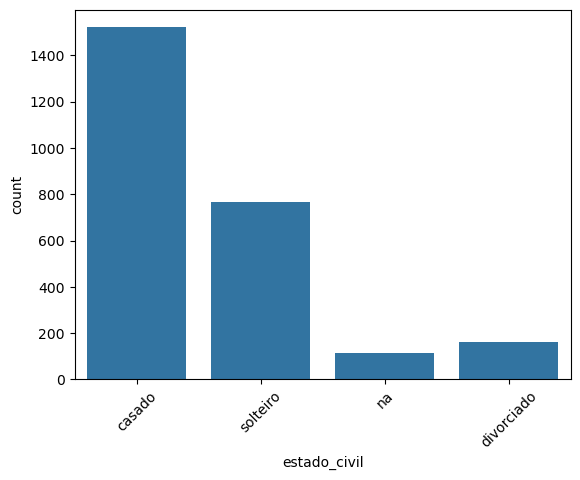

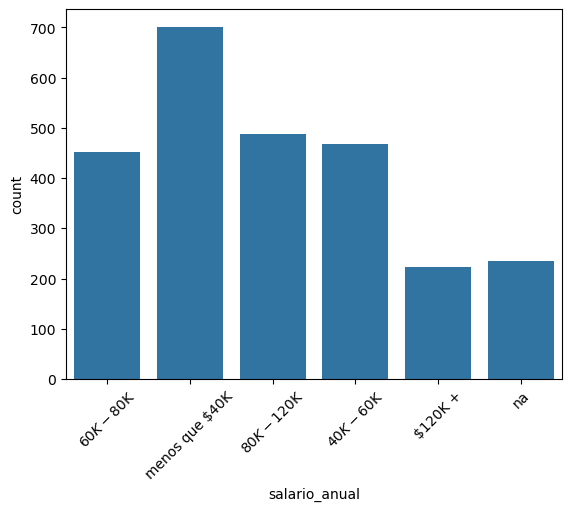

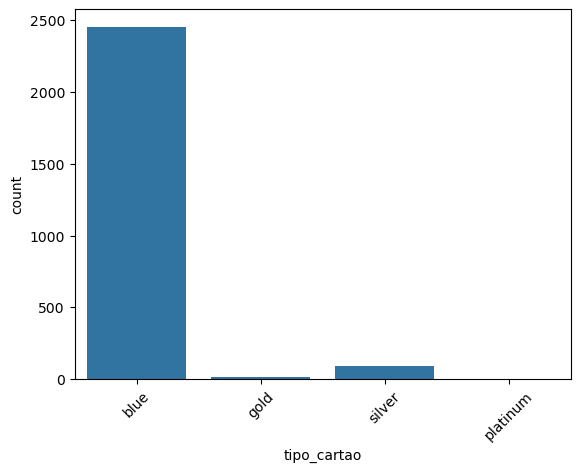

In [43]:
# A seguir, fazemos uma exploratória das variáveis qualitativas:
for c in var_qualitativas:
    countplot_qualitativas(data=credito, x=c)


In [45]:
# Podemos ver um forte desbalanceamento nos nossos dados com relação à variável tipo_cartao, onde o tipo blue domina
# fortemente os outros tipos.

credito[var_quantitativas].corr()

,idade,dependentes,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
idade,1.000000,-0.067396,-0.059790,-0.073306,0.004495,0.012920,-0.274570,-0.253683
dependentes,-0.067396,1.000000,0.002769,-0.064331,-0.036481,0.168681,-0.080882,-0.062720
qtd_produtos,-0.059790,0.002769,1.000000,-0.011138,-0.054148,0.002783,0.168633,0.155743
iteracoes_12m,-0.073306,-0.064331,-0.011138,1.000000,0.036965,-0.036480,0.119092,0.103338
meses_inativo_12m,0.004495,-0.036481,-0.054148,0.036965,1.000000,-0.009341,0.003061,0.005214
limite_credito,0.012920,0.168681,0.002783,-0.036480,-0.009341,1.000000,-0.004686,0.015857
valor_transacoes_12m,-0.274570,-0.080882,0.168633,0.119092,0.003061,-0.004686,1.000000,0.827740
qtd_transacoes_12m,-0.253683,-0.062720,0.155743,0.103338,0.005214,0.015857,0.827740,1.000000
